# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simingdeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/simingdeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simingdeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
df.shape

(11314, 4)

In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [6]:
# 4. Find class balances, print out how many of each topic_category there are.
df['topic_category'].value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [7]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def make_lower(string):
    return string.lower()

make_lower(test_string)

'this is a sentence with lots of caps.'

In [8]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(string):
    string = re.sub(r'[^\w\s]', '', string)
    return string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [9]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(string):
    words = word_tokenize(string)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    string = ' '.join(valid_words)
    return string

remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [10]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_words(string):
    porter = PorterStemmer()
    words = word_tokenize(string)
    valid_words = []
    for word in words:
        stemmed_word = porter.stem(word)
        valid_words.append(stemmed_word)
    string = ' '.join(valid_words)
    return string

stem_words(test_string)

'I play and start play with player and we all love to play with play'

In [11]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(string):
    string = make_lower(string)
    string = remove_punctuation(string)
    string = stem_words(string)
    string = remove_stopwords(string)
    return string

test_string = 'I played and started playing with players and we all love to play with plays'

text_pipeline(test_string)


'play start play player love play play'

In [12]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)
df

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu thing subject car thi nntppost...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...
...,...,...,...,...,...
11309,11309,From: jim.zisfein@factory.com (Jim Zisfein) \r...,13,sci.med,jimzisfeinfactorycom jim zisfein subject migra...
11310,11310,From: ebodin@pearl.tufts.edu\r\nSubject: Scree...,4,comp.sys.mac.hardware,ebodinpearltuftsedu subject screen death mac p...
11311,11311,From: westes@netcom.com (Will Estes)\r\nSubjec...,3,comp.sys.ibm.pc.hardware,westesnetcomcom est subject mount cpu cooler v...
11312,11312,From: steve@hcrlgw (Steven Collins)\r\nSubject...,1,comp.graphics,stevehcrlgw steven collin subject sphere 4 poi...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [13]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

In [14]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [15]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
# 4. Transform your X data using your fitted vectorizer. 

X_transformed = vectorizer.transform(X)

In [17]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X_transformed.shape, type(X_transformed))

(11314, 119652) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [18]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

In [19]:
X_train[0]

<1x119652 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [20]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha = 0.05)


In [21]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [22]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


In [23]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.914715


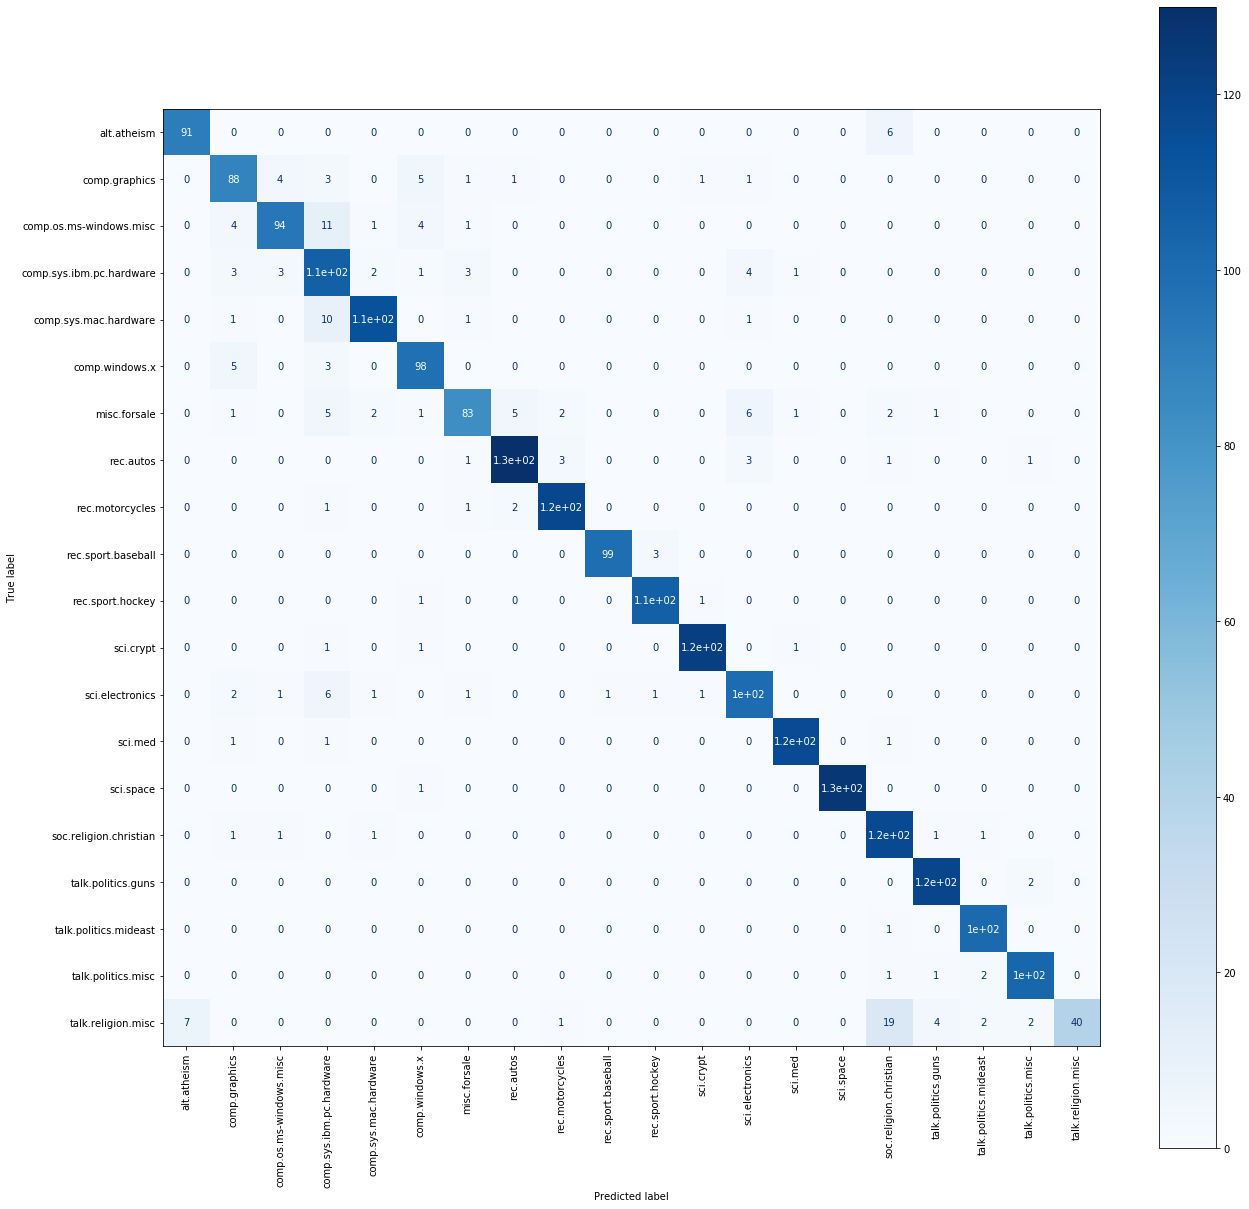

In [24]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize = (21,21))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax = ax)

plt.xticks(rotation = 90)

disp

In [25]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names = model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.94      0.93        97
           comp.graphics       0.83      0.85      0.84       104
 comp.os.ms-windows.misc       0.91      0.82      0.86       115
comp.sys.ibm.pc.hardware       0.72      0.86      0.79       123
   comp.sys.mac.hardware       0.94      0.90      0.92       126
          comp.windows.x       0.88      0.92      0.90       106
            misc.forsale       0.90      0.76      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.95      0.97      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.98      0.98      0.98       125
         sci.electronics       0.87      0.88      0.87       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [26]:
#pd.options.display.max_colwidth = 100
talk_politics_guns = df[df['topic_category'] == 'talk.politics.guns']
talk_politics_guns['message'][67]

'From: lwb@cs.utexas.edu (Lance W. Bledsoe)\r\nSubject: Re: ATF suspects drug lab in compound\r\nOrganization: CS Dept, University of Texas at Austin\r\nLines: 24\r\nNNTP-Posting-Host: im4u.cs.utexas.edu\r\n\r\n>In article <1993Mar28.180629.21574@mnemosyne.cs.du.edu> rcanders@nyx.cs.du.edu (Mr. Nice Guy) writes:\r\n>>A Associated Press News story 3/28/93 reports:\r\n>> \r\n>>"    In other developments Saturday, David Troy, intelligence chief for\r\n>>the ATF, confirmed reports that authorities suspected the cult had a\r\n>>methamphetamine lab.  He said evidence of possible drug activity\r\n>>surfaced late in the ATF\' investigation of the cult\'s gun dealings.\r\n\r\nWow, the scope of the mission of the ATF continues to expand.  Besides\r\nAlcohol, Tobacco, and Firearms, they now seem to be involded in Child\r\nProtective Services, Drug Enforcement and Tax Evasion.\r\n\r\nThey look to be on the road to being the nations *boys in blue*!\r\nNo Knock in one hand, M-16 in the other.  Zeik-

In [27]:
my_sentence = "But even if most of the deaths are suicides, won't gun control help?\
    While suicides account for the overwhelming majority of all gun-related\
    deaths in Canada (80% in 1987), over two-thirds of all suicides are\
    committed by methods other than firearms.\
    For 'gun control' to prevent suicides, potential suicides would have to\
    be very fleeting impulses that would pass before a person could get a\
    key, put it into a lock, open the lock, load the firearm, and fire it.\
    Since roughly as many people hang/suffocate/strangle themselves, the\
    argument is absurd.\
    Many suicides are contemplated for weeks or months and there are many\
    methods that are just as 'impulsive' and just as deadly, such as jumping\
    off buildings.\
    There are two main types of suicides: the ones who want to die and the\
    ones who 'cry out for help'.  The former uses methods that offer little\
    in the way of a 'second chance' (firearms, jumping off buildings) and\
    the latter group uses methods that take a long time (pills).  Most\
    suicides follow months or years of depression or illness, unlocking a\
    gun takes at most a couple of minutes."

# 1. Apply the text pipeline to your sentence
cleaned = text_pipeline(my_sentence)
print(cleaned)

even death suicid wont gun control help suicid account overwhelm major gunrel death canada 80 1987 twothird suicid commit method firearm gun control prevent suicid potenti suicid would veri fleet impuls would pass befor person could get key put lock open lock load firearm fire sinc roughli mani peopl hangsuffocatestrangl themselv argument absurd mani suicid contempl week month mani method impuls deadli jump build two main type suicid one want die one cri help former use method offer littl way second chanc firearm jump build latter group use method take long time pill suicid follow month year depress ill unlock gun take coupl minut


In [28]:
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([cleaned])

# 3. Use the model to predict your new `X`. 
y_pred_new = model.predict(X)

# 4. Print the prediction
print(y_pred_new)

['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [29]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [ ]:
df['Tweet_Cleaned'] = df['Tweet'].apply(text_pipeline)
df

In [ ]:
X = df['Tweet_Cleaned'].values

y = df['Party'].values

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
vectorizer.fit(X)
X_transformed = vectorizer.transform(X)

In [ ]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

In [ ]:
print(classification_report(y_test, y_pred, target_names = model.classes_))